Hoang Anh Nguyen

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def rectify_document(img_bgr, corners):
    """
    Perform document rectification using perspective transformation.
    
    Args:
        img_bgr: Input image in BGR format
        corners: List of 4 corner points [top-left, top-right, bottom-right, bottom-left]
        
    Returns:
        warped_img: Rectified document image
    """
    # Convert corners to numpy array
    src_points = np.array(corners, dtype=np.float32)
    
    # Width
    width_top = np.sqrt(((src_points[1][0] - src_points[0][0]) ** 2) + 
                        ((src_points[1][1] - src_points[0][1]) ** 2))
    width_bottom = np.sqrt(((src_points[2][0] - src_points[3][0]) ** 2) + 
                           ((src_points[2][1] - src_points[3][1]) ** 2))
    max_width = int(max(width_top, width_bottom))
    
    # Height
    height_left = np.sqrt(((src_points[3][0] - src_points[0][0]) ** 2) + 
                          ((src_points[3][1] - src_points[0][1]) ** 2))
    height_right = np.sqrt(((src_points[2][0] - src_points[1][0]) ** 2) + 
                           ((src_points[2][1] - src_points[1][1]) ** 2))
    max_height = int(max(height_left, height_right))
    
    # Define destination points for the rectified document (rectangle)
    dst_points = np.array([
        [0, 0],                          # Top-left
        [max_width - 1, 0],              # Top-right
        [max_width - 1, max_height - 1], # Bottom-right
        [0, max_height - 1]              # Bottom-left
    ], dtype=np.float32)
    
    # Compute the perspective transformation matrix
    homography_matrix = cv2.getPerspectiveTransform(src_points, dst_points)
    
    # Apply the perspective transformation to warp the image
    warped_img = cv2.warpPerspective(img_bgr, homography_matrix, (max_width, max_height))
    
    return warped_img, homography_matrix

In [3]:
# Define the image corner points 
corners = [
    [1100., 300.],  # 1. Top-Left
    [2700., 1080.], # 2. Top-Right
    [2450., 3400.], # 3. Bottom-Right
    [300., 3150.]   # 4. Bottom-Left
]

image_path="data/input.jpg"
img_bgr = cv2.imread(image_path) # Load the image

# Document Rectification using Fixed Coordinates
warped_img, homography_matrix = rectify_document(img_bgr, corners)


In [4]:
print("Homography Matrix (3x3):")
print(homography_matrix)

Homography Matrix (3x3):
[[ 8.23398274e-01  2.31129340e-01 -9.75076903e+02]
 [-4.99271624e-01  1.02414692e+00  2.41954710e+02]
 [-1.34454712e-04  5.13463331e-05  1.00000000e+00]]


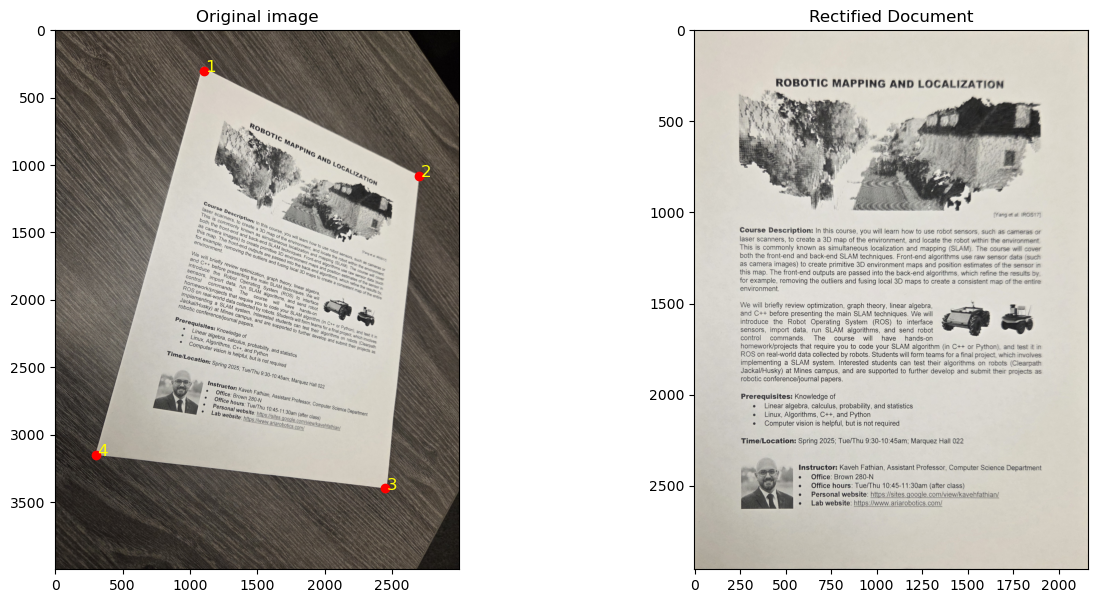

In [5]:
# Display Results
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # Convert to RGB for display with matplotlib
axes[0].imshow(img_rgb) # Original Image
axes[0].set_title('Original image')

# Mark the selected points on the original image
for i, (x, y) in enumerate(corners):
    axes[0].plot(x, y, 'ro') # Red circle
    axes[0].text(x + 10, y + 10, str(i + 1), color='yellow', fontsize=12)

warped_img_rgb = cv2.cvtColor(warped_img, cv2.COLOR_BGR2RGB) # Convert the warped image to RGB for display
axes[1].imshow(warped_img_rgb) # Warped/Rectified Image
axes[1].set_title('Rectified Document')
plt.show()